In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [2]:
np.random.seed(7)
n_points = 20
X = np.sort(np.random.uniform(0, 1, n_points))
print(X)
N = np.random.normal(0, 1, 20)
print(N)

[0.02489923 0.06593635 0.07205113 0.07630829 0.21338535 0.26843898
 0.2881456  0.38094113 0.43840923 0.45212396 0.4998825  0.50112046
 0.53849587 0.67923    0.72346518 0.77991879 0.80373904 0.90959353
 0.93120602 0.97798951]
[ 0.55458031  0.12388091  0.27445992 -1.52652453  1.65069969  0.15433554
 -0.38713994  2.02907222 -0.04538603 -1.4506787  -0.40522786 -2.2883151
  1.04939655 -0.41647432 -0.74255353  1.07247013 -1.65107559  0.53542936
 -2.0644148  -0.66215934]


In [3]:
y= (np.sin(2*np.pi*X)) + (N * 0.1)
print(y)

[ 0.21126709  0.41492845  0.4648507   0.3086469   1.13872346  1.00872981
  0.93270098  0.88313176  0.37286061  0.1512299  -0.03978452 -0.23587153
 -0.13458545 -0.94440395 -1.0603892  -0.87513572 -1.10864255 -0.48443847
 -0.62535215 -0.20407149]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

Weights=
[[0.]]


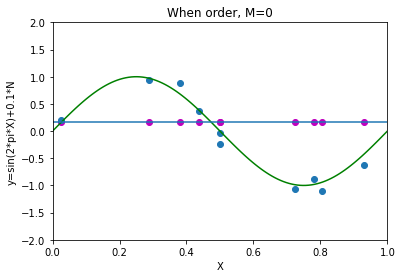

Weights=
[[ 0.         -1.33463811]]


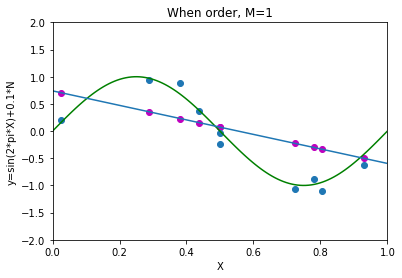

Weights=
[[  0.          13.30420938 -37.53586665  24.76173891]]


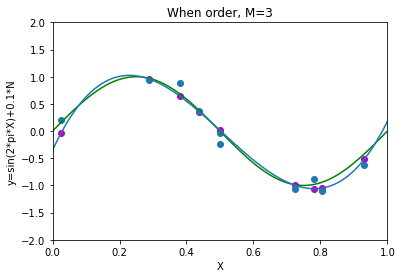

Weights=
[[ 0.00000000e+00  3.77498036e+03 -6.53271614e+04  5.67429898e+05
  -2.78175659e+06  8.14182340e+06 -1.44638435e+07  1.52369220e+07
  -8.72751093e+06  2.08873886e+06]]


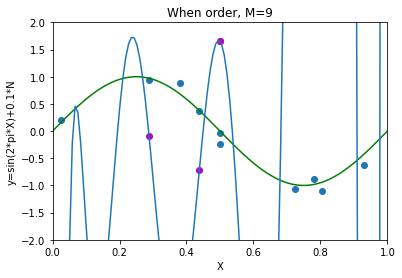

In [5]:
X_plot = np.linspace(0, 1, 120).reshape((-1,1))
power = [0, 1, 3, 9]
coefs_list = {}
for i in range(len(power)):
  d = str(power[i])

  polynomial_features = PolynomialFeatures(power[i])
  X_train_transformed = polynomial_features.fit_transform(X_train)
  polynomial_features.fit(X_train_transformed, y_train)

  lr_model = LinearRegression()
  lr_model.fit(X_train_transformed, y_train)

  M = 'M'+ d
  coefs_list[M] = lr_model.coef_
  print("Weights=")
  print(coefs_list[M])

  X_test_transformed = polynomial_features.fit_transform(X_test)
  predictions = lr_model.predict(X_test_transformed)
  #print(len(predictions))

  X_plot_transformed = polynomial_features.fit_transform(X_plot)
  plot_predictions = lr_model.predict(X_plot_transformed)
  #print(len(plot_predictions))

  plt.plot(X_plot, np.sin(2*np.pi*X_plot), color='green')
  plt.scatter(X_test, predictions, color='m')
  plt.scatter(X_test, y_test)
  plt.plot(X_plot, plot_predictions)
  plt.title('When order, M='+d)
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+0.1*N')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.show()

Training Errors:
[0.6091998180145403, 0.426299489341603, 0.4261533737763703, 0.10822830415689316, 0.08715291884928097, 0.08153019157032773, 0.07677872976664782, 0.03526068719563801, 0.03133422841858802]
Testing Errors:
[0.7891964583348441, 0.5291797635878873, 0.5309008553266601, 0.1549279402435773, 0.19916475503163983, 0.1644866723820464, 0.26879176506066527, 0.4762475230368466, 0.5814684100471996]


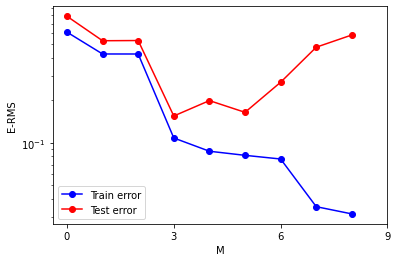

In [6]:
train_error = []
test_error = []

for i in range(0, 9):
    
  pipeline = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
  pipeline.fit(X_train, y_train)

  train_predictions = pipeline.predict(X_train)
  train_loss = np.sqrt(mean_squared_error(y_train, train_predictions))
  train_error.append(train_loss)

  test_predictions = pipeline.predict(X_test)
  test_loss = np.sqrt(mean_squared_error(y_test, test_predictions))
  test_error.append(test_loss)
print("Training Errors:")
print(train_error)
print("Testing Errors:")
print(test_error)
plt.plot(train_error, label="Train error", marker='o', color='blue')
plt.plot(test_error, label="Test error", marker='o', color='red')
plt.yscale('log')
plt.xticks([0,3,6,9])
plt.xlabel("M")
plt.ylabel("E-RMS")
plt.legend(loc="best")
plt.show()

In [7]:
new_points = 120
X_new = np.sort(np.random.uniform(0, 1, new_points))
N_new = np.random.normal(scale=0.1 , size=new_points )
y_new = np.sin(2*np.pi*X_new)+ N_new * 0.1
X_new = X_new[:, np.newaxis]
#training
X_train_new, y_train_new, X_test_new, y_test_new = train_test_split(X_new, y_new, test_size=0.5)


[]

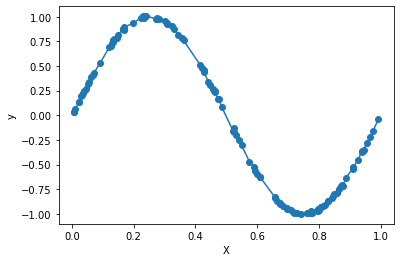

In [8]:
plt.scatter(X_new, y_new)
plt.plot(X_new, y_new)
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

ValueError: x and y must be the same size

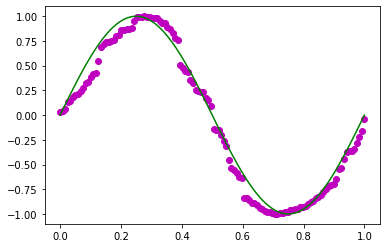

In [9]:
def show_plot(degree, X_train, y_train, X_test, preds, plot_preds):
  # plt.scatter(X_train, y_train)
  # plt.scatter(X_test, sort(y_test)
  plt.plot(X_plot, np.sin(2*np.pi*X_plot), color='green')
  # plt.plot(X_test, preds, color='m')
  plt.scatter(X_test, preds, color='m')
  plt.scatter(X_test, y_test)
  plt.plot(X_plot, plot_preds)
  plt.title('When order, M='+degree)
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+N')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.show()

d = 9
pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
pipeline.fit(X_new, y_new)
preds_new = pipeline.predict(X_new)

X_plot_preds_new = pipeline.predict(X_plot)

show_plot(str(d), X_new, y_new, X_plot, preds_new, X_plot_preds_new)

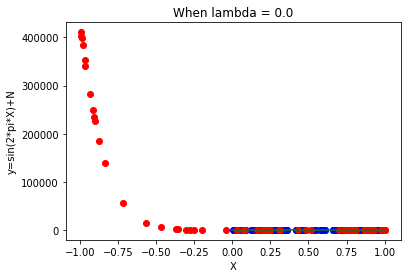

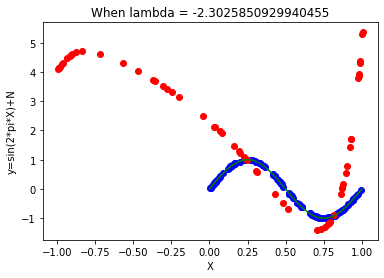

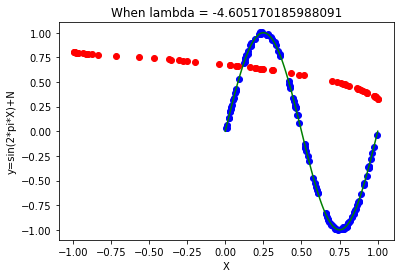

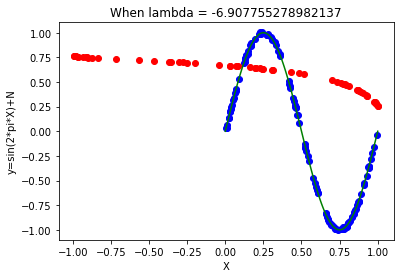

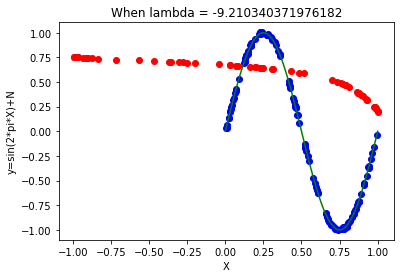

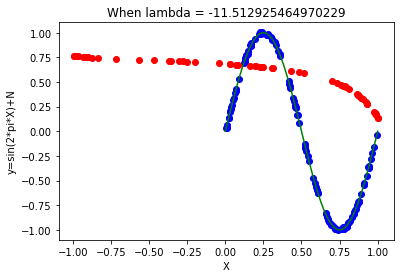

In [ ]:
lambda_values = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
llam=[]
for each in lambda_values:
    llam.append(np.log(each))

train_error_ridge = []
test_error_ridge = []

for lambda_value in llam:
    
  pipeline = make_pipeline(PolynomialFeatures(degree=9),Ridge(alpha=lambda_value))
  pipeline.fit(X_train_new, y_train_new)

  y_train_preds_ridge = pipeline.predict(X_train_new)
  y_test_preds_ridge = pipeline.predict(X_test_new[:, np.newaxis])


  train_loss_ridge = np.sqrt(mean_squared_error(y_train_new, y_train_preds_ridge))
  train_error_ridge.append(train_loss_ridge)

 
  test_loss_ridge = np.sqrt(mean_squared_error(y_test_new, y_test_preds_ridge))
  test_error_ridge.append(test_loss_ridge)

  plt.plot(X_plot,np.sin(2*np.pi*X_plot),'g') 
  plt.scatter(X_new,y_new, color='blue')
  plt.scatter(X_test_new,y_test_preds_ridge,color='red')
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+N')
  plt.title("When lambda = "+str(lambda_value))
  plt.show()

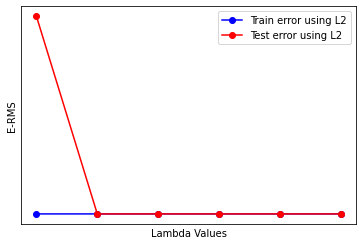

In [ ]:

plt.plot(train_error_ridge, label="Train error using L2", color='blue', marker='o')
plt.plot(test_error_ridge, label="Test error using L2", color='red', marker='o')

plt.xticks([])
plt.yticks([])

plt.xlabel("Lambda Values")
plt.ylabel("E-RMS")

plt.legend(loc="best")

plt.show()